## Imports

In [1]:
from pyjavaproperties import Properties
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab as pl
%matplotlib inline

## Settings to enable real-time output from a shell command

In [2]:
from subprocess import Popen, PIPE, STDOUT
from IPython.core.magic import register_line_magic

@register_line_magic
def runrealcmd(command):
    process = Popen(command, stdout=PIPE, shell=True, stderr=STDOUT, bufsize=1, close_fds=True)
    for line in iter(process.stdout.readline, b''):
        print(line.rstrip().decode('utf-8'))
    process.stdout.close()
    process.wait()

### Download the input file from here:
http://download.smartdatalake.eu/datasets/dblp/dblp_authors_papers.csv.zip

# 1. Vary the similarity threshold

## 1.a Load and optionally edit the config file

In [3]:
config_file_example = '../config.properties.example'
config_file = '../config.properties'
input_file = '../data/dblp_authors_papers.csv'
output_file = '../data/output/dblp_authors_papers_selfjoin_out.csv'
stats_file = '../data/output/stats.csv'

params = Properties()
params.load(open(config_file_example))
params['input_file'] = input_file
params['output_file'] = output_file
params['stats_file'] = stats_file
params['operation'] = 'self-join'
params['mode'] = 'fuzzy'
params['fuzzyset_column'] = '1'
params['set_column'] = '2'
params['tokens_column'] = '3'
params['column_delimiter'] = ';'
params['token_delimiter'] = ' '
params['max_lines'] = '10000'
params['return_counts'] = 'true'

## 1.b Run the experiment

In [4]:
stats = pd.DataFrame(0, index=[0.5, 0.6, 0.7, 0.8, 0.9], columns=['NumMatches', 'Time'])
results = Properties()
for thres in [0.5, 0.6, 0.7, 0.8, 0.9]:
    print('Threshold is {}'.format(thres))
    params['sim_threshold']= str(thres)
    params.store(open(config_file, 'w'))
    %runrealcmd java -jar ../target/simjoin-0.0.1-SNAPSHOT-jar-with-dependencies.jar $config_file
    results.load(open(stats_file))
    stats.loc[thres,'NumMatches'] = results['totalMatches']
    stats.loc[thres,'Time'] = results['joinTime']

Threshold is 0.5
Finished reading file. Lines read: 10000. Lines skipped due to errors: 0. Num of sets: 209. Elements per set: 47.84688995215311
|=====================|100%
Transformation Time: 0.029196601 sec.
Indexing Time: 0.021778536 sec.

Total Join Time: 5.59265205 sec.
Signature Generation Time: 0.067614589 sec.
Check Filter Time: 0.023498109 sec.
NN Filter Time: 0.200137853 sec.
Verification Time: 5.286194616 sec.

Check Filter Candidates: 294
NN Filter Candidates: 272

Total Matches: 257
Threshold is 0.6
Finished reading file. Lines read: 10000. Lines skipped due to errors: 0. Num of sets: 209. Elements per set: 47.84688995215311
|=====================|100%
Transformation Time: 0.031353599 sec.
Indexing Time: 0.021690106 sec.

Total Join Time: 4.23948782 sec.
Signature Generation Time: 0.038474959 sec.
Check Filter Time: 0.015210008 sec.
NN Filter Time: 0.084045948 sec.
Verification Time: 4.093996114 sec.

Check Filter Candidates: 256
NN Filter Candidates: 244

Total Matches: 

In [5]:
stats

,NumMatches,Time
0.5,257,5.59265205
0.6,238,4.23948782
0.7,236,3.971678638
0.8,235,3.733163184
0.9,235,3.894853344


## 1.c Plot the results

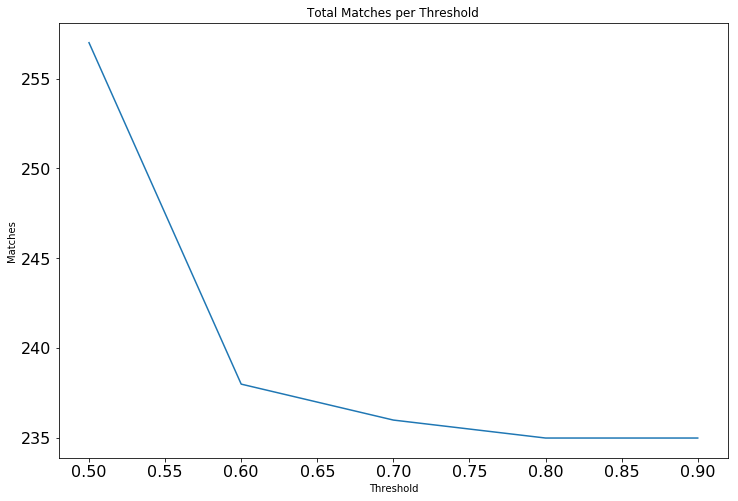

In [6]:
stats.NumMatches = stats.NumMatches.astype('long')
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.set_ylabel('Matches')
ax.set_xlabel('Threshold')
stats.NumMatches.plot.line(ax=ax, fontsize=16, title='Total Matches per Threshold')

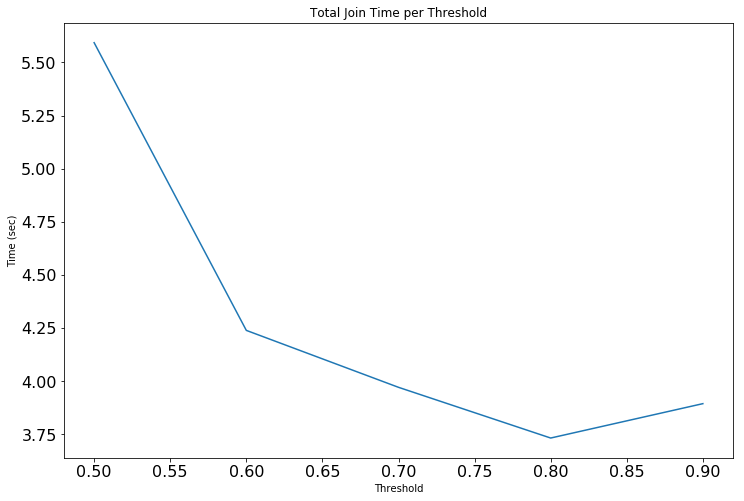

In [7]:
stats.Time = stats.Time.astype('float64')
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.set_ylabel('Time (sec)')
ax.set_xlabel('Threshold')
stats.Time.plot.line(ax=ax, fontsize=16, title='Total Join Time per Threshold')

# 2. Vary dataset size

## 2.a Load and optionally edit the config file

In [8]:
params = Properties()
params.load(open(config_file_example))
params['input_file'] = input_file
params['output_file'] = output_file
params['stats_file'] = stats_file
params['operation'] = 'self-join'
params['mode'] = 'fuzzy'
params['fuzzyset_column'] = '1'
params['set_column'] = '2'
params['tokens_column'] = '3'
params['column_delimiter'] = ';'
params['token_delimiter'] = ' '
params['return_counts'] = 'true'
params['sim_threshold']= '0.8'

## 2.b Run the experiment

In [9]:
stats = pd.DataFrame(0, index=np.arange(.2,1.1,.2), columns=['NumMatches', 'Time'])
results = Properties()
size = 50000
for prop in np.arange(.2,1.1,.2):
    print('Size is {}% or {:,}'.format(int(prop*100), int(prop*size)))
    params['max_lines']= str(int(prop*size))
    params.store(open(config_file, 'w'))
    %runrealcmd java -jar ../target/simjoin-0.0.1-SNAPSHOT-jar-with-dependencies.jar $config_file
    results.load(open(stats_file))
    stats.loc[prop,'NumMatches'] = results['totalMatches']
    stats.loc[prop,'Time'] = results['joinTime']

Size is 20% or 10,000
Finished reading file. Lines read: 10000. Lines skipped due to errors: 0. Num of sets: 209. Elements per set: 47.84688995215311
|=====================|100%
Transformation Time: 0.030596936 sec.
Indexing Time: 0.025675201 sec.

Total Join Time: 4.236790875 sec.
Signature Generation Time: 0.046754726 sec.
Check Filter Time: 0.015347539 sec.
NN Filter Time: 0.23715989 sec.
Verification Time: 3.925623846 sec.

Check Filter Candidates: 236
NN Filter Candidates: 235

Total Matches: 235
Size is 40% or 20,000
Finished reading file. Lines read: 20000. Lines skipped due to errors: 0. Num of sets: 376. Elements per set: 53.191489361702125
|=====================|100%
Transformation Time: 0.039838628 sec.
Indexing Time: 0.030304476 sec.

Total Join Time: 21.770950683 sec.
Signature Generation Time: 0.045448439 sec.
Check Filter Time: 0.013613108 sec.
NN Filter Time: 0.333213015 sec.
Verification Time: 21.370295384 sec.

Check Filter Candidates: 411
NN Filter Candidates: 410

T

In [10]:
stats

,NumMatches,Time
0.2,235,4.236790875
0.4,410,21.770950683
0.6,610,35.427415255
0.8,771,59.078933746
1.0,950,69.82705186


## 2.c Plot the results

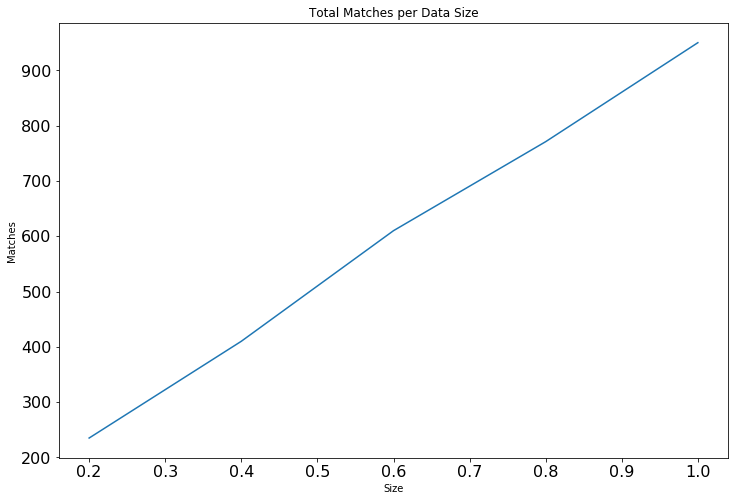

In [11]:
stats.NumMatches = stats.NumMatches.astype('long')
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.set_ylabel('Matches')
ax.set_xlabel('Size')
stats.NumMatches.plot.line(ax=ax, fontsize=16, title='Total Matches per Data Size')

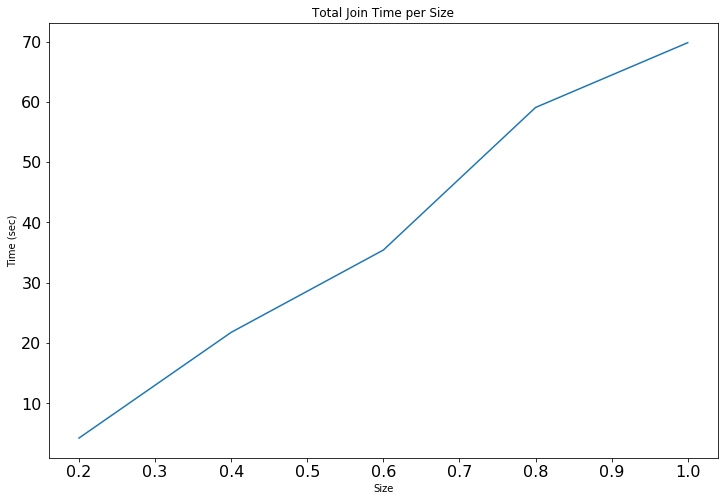

In [12]:
stats.Time = stats.Time.astype('float64')
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.set_ylabel('Time (sec)')
ax.set_xlabel('Size')
stats.Time.plot.line(ax=ax, fontsize=16, title='Total Join Time per Size')

# 3. Histogram of similarity scores

## 3.a Load and optionally edit the config file

In [13]:
params = Properties()
params.load(open(config_file_example))
params['input_file'] = input_file
params['output_file'] = output_file
params['stats_file'] = stats_file
params['operation'] = 'self-join'
params['mode'] = 'fuzzy'
params['fuzzyset_column'] = '1'
params['set_column'] = '2'
params['tokens_column'] = '3'
params['column_delimiter'] = ';'
params['token_delimiter'] = ' '
params['sim_threshold']= '0.6'
params['max_lines'] = '10000'
params.store(open(config_file, 'w'))

## 3.b Run the experiment

In [14]:
%runrealcmd java -jar ../target/simjoin-0.0.1-SNAPSHOT-jar-with-dependencies.jar $config_file

Finished reading file. Lines read: 10000. Lines skipped due to errors: 0. Num of sets: 209. Elements per set: 47.84688995215311
|=====================|100%
Transformation Time: 0.028773034 sec.
Indexing Time: 0.018823398 sec.

Total Join Time: 4.79445626 sec.
Signature Generation Time: 0.04065873 sec.
Check Filter Time: 0.018656527 sec.
NN Filter Time: 0.118971034 sec.
Verification Time: 4.598868968 sec.

Check Filter Candidates: 256
NN Filter Candidates: 244

Total Matches: 238


## 3.c Plot the results

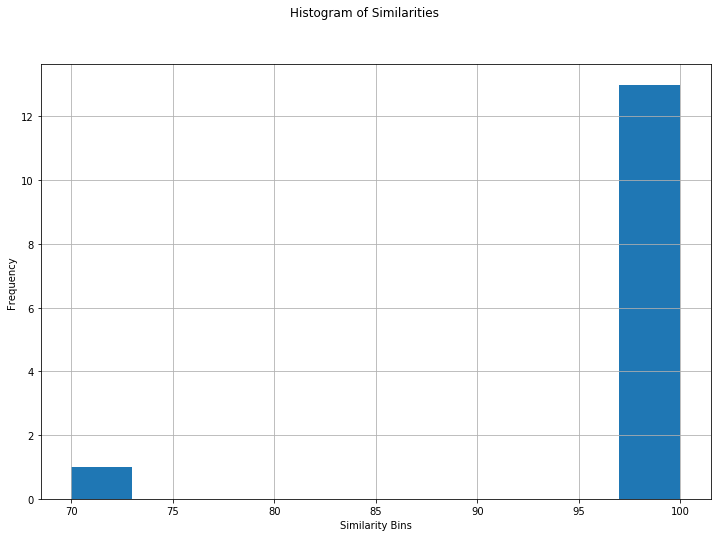

In [15]:
out1 = pd.read_csv(output_file, header=None, names=['User_ID_1', 'User_ID_2', 'Similarity'])
out1['Bin'] = (out1.Similarity*100).astype('int')
out1.head()
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.set_xlabel('Similarity Bins')
ax.set_ylabel('Frequency')
pl.suptitle("Histogram of Similarities")
out1.Bin.hist()